In [2]:
import cv2
 
from erctag import ALVAR_TAGS, TagDetector, visualize_tags

In [3]:
import matplotlib.pyplot as plt

In [38]:
img = cv2.imread('../data/examples/img_000539_1691417504471.jpg', )


In [39]:
detector = TagDetector(ALVAR_TAGS, visualize=False)

In [40]:
detection = detector.detect_tags(img)

In [19]:
detection

[Detection(tag_id=3, corners=[(607, 464), (542, 465), (552, 523), (616, 521)], value=array([0.87621281, 0.87820938, 0.24916869, 0.73818401, 0.88141969,
        0.87721822, 0.87572441, 0.24627438, 0.74576089, 0.87961707,
        0.87444612, 0.25847641, 0.78494534, 0.39618209, 0.68862173,
        0.30673876, 0.74038884, 0.87179592, 0.79120073, 0.84959677,
        0.63658884, 0.43307552, 0.8417038 , 0.5370765 , 0.4017624 ]), distance=5.997120201587677, t=None, R=None)]

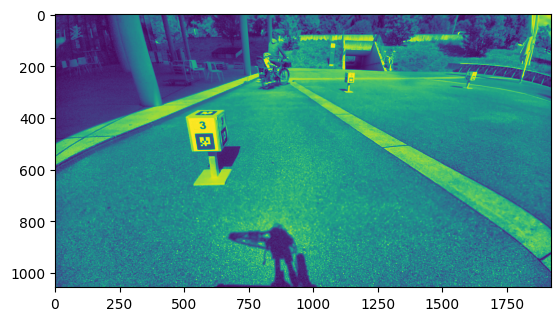

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe_img = clahe.apply(gray)

plt.imshow(clahe_img)

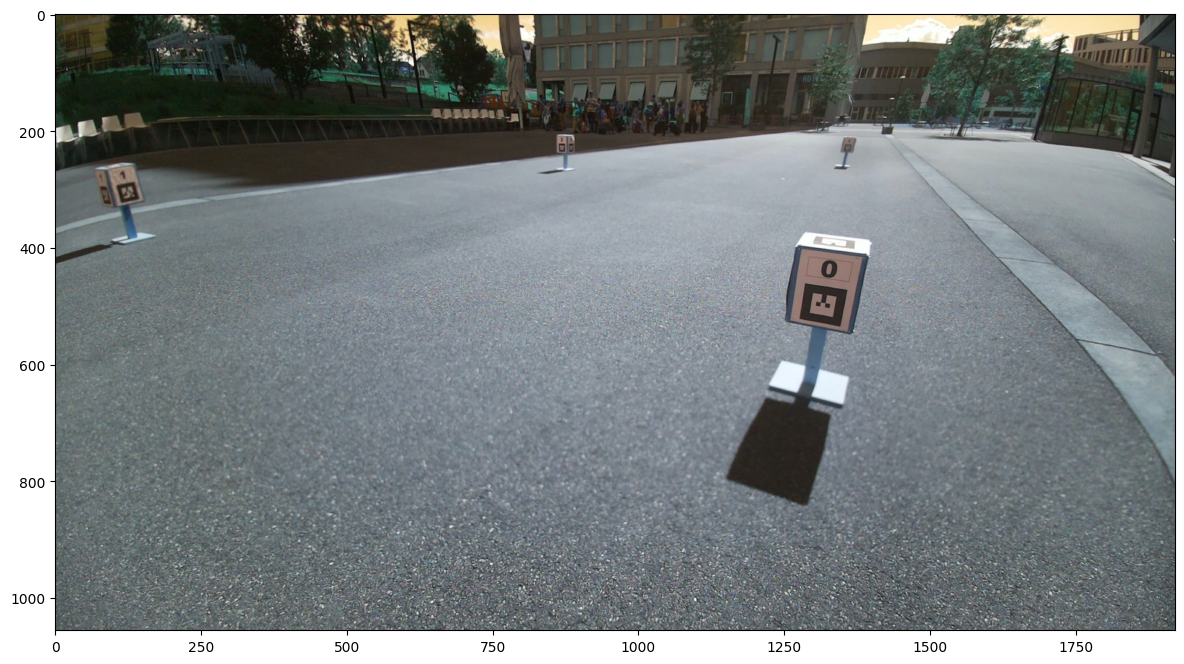

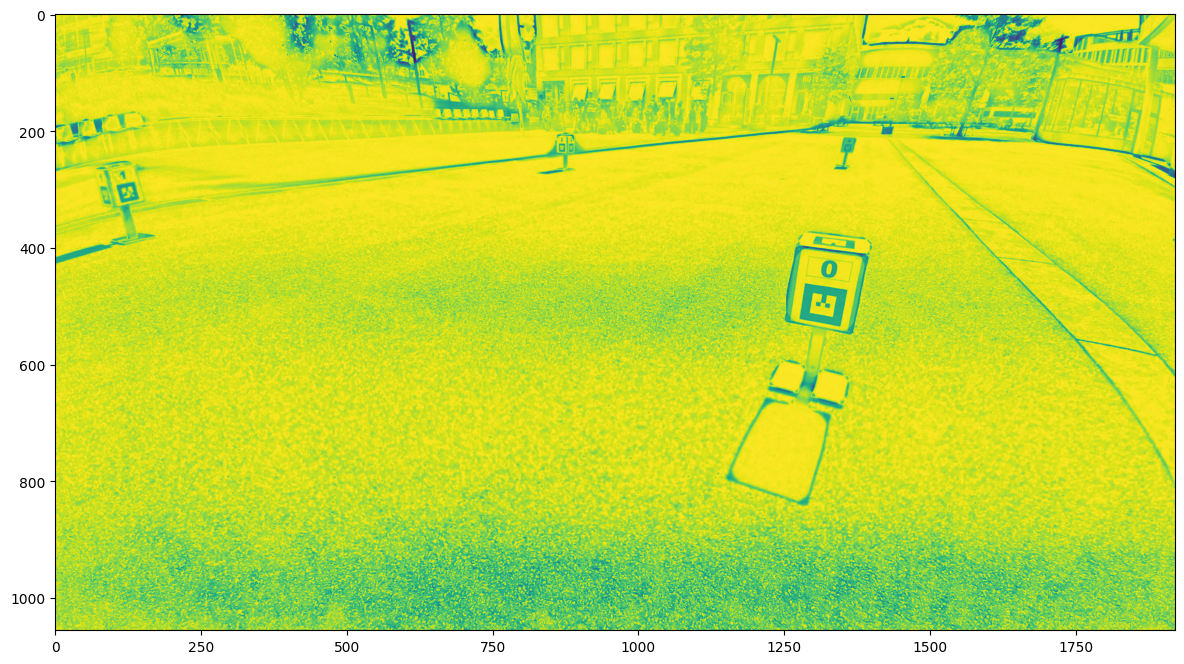

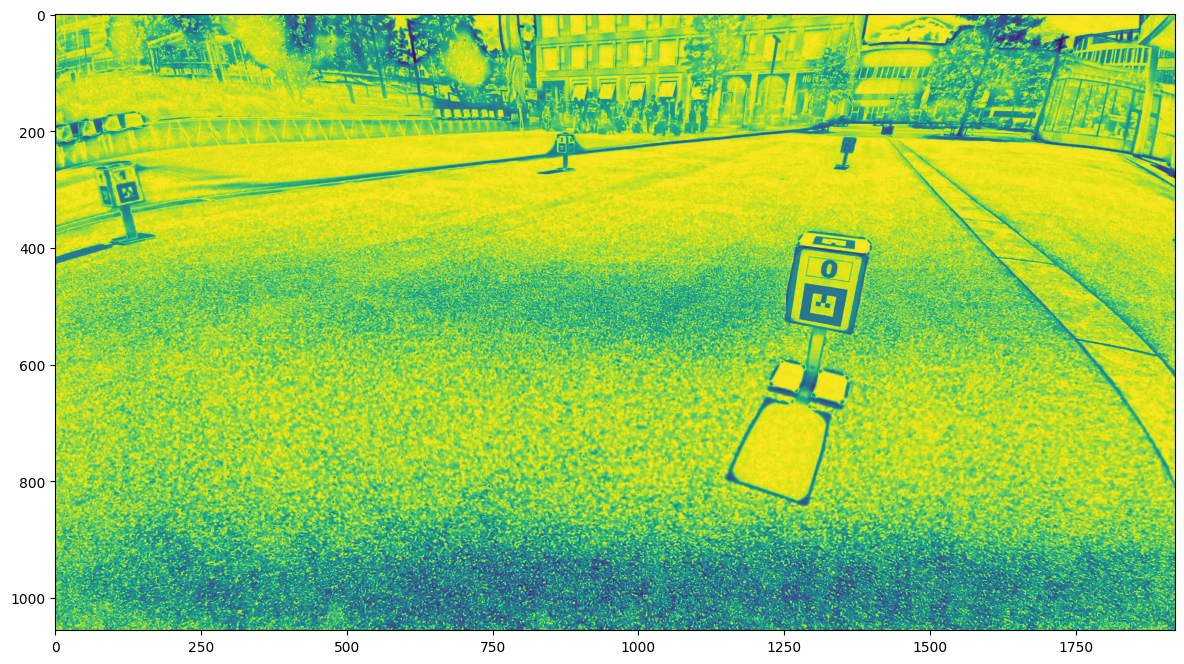

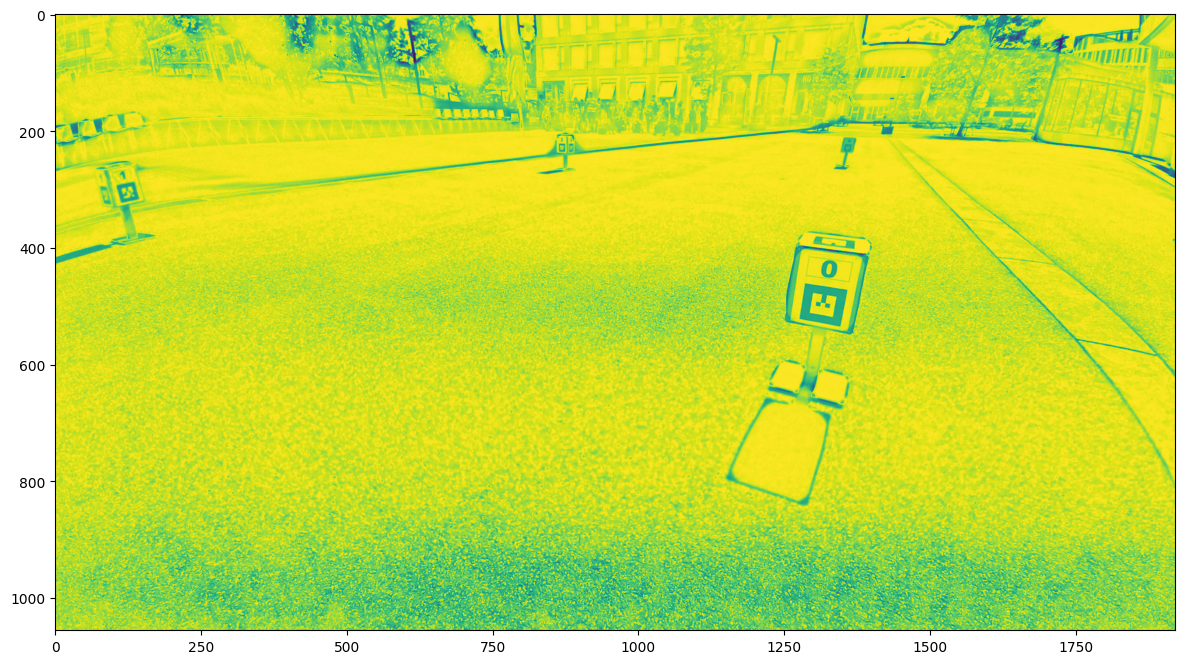

In [48]:

import numpy as np
plt.figure(figsize=(16, 8))


rgb_planes = cv2.split(img)
result_planes = []
plt.imshow(img)
plt.show()
plt.figure(figsize=(16, 8))

for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 33)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    result_planes.append(diff_img)
gray = cv2.cvtColor(cv2.merge(result_planes), cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
plt.figure(figsize=(16, 8))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
result = clahe.apply(gray)

plt.imshow(result)
plt.show()
plt.figure(figsize=(16, 8))

min_val, max_val, _, _ = cv2.minMaxLoc(gray)
contrast_stretched = (gray - min_val) * (255.0 / (max_val - min_val))

plt.imshow(contrast_stretched)
plt.show()

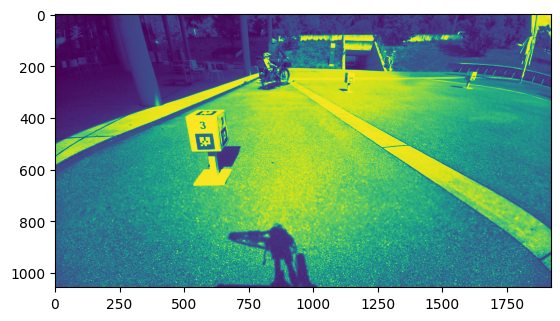

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray)
plt.imshow(equalized_img)

In [50]:
np.load('../data/calibration/calibration.pkl', allow_pickle=True)

(array([[1.46757449e+03, 0.00000000e+00, 6.70924232e+02],
        [0.00000000e+00, 1.76992957e+03, 3.76939073e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[ 1.3628861 , -5.59947733, -0.01674108, -0.22750355, 10.2141071 ]]))